In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ins_df = pd.read_csv('insurance.csv')

In [3]:
ins_df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [5]:
ins_df['smoker'] = ins_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [6]:
ins_df['sex'] = ins_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [7]:
ins_df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>, <Axes: >]], dtype=object)

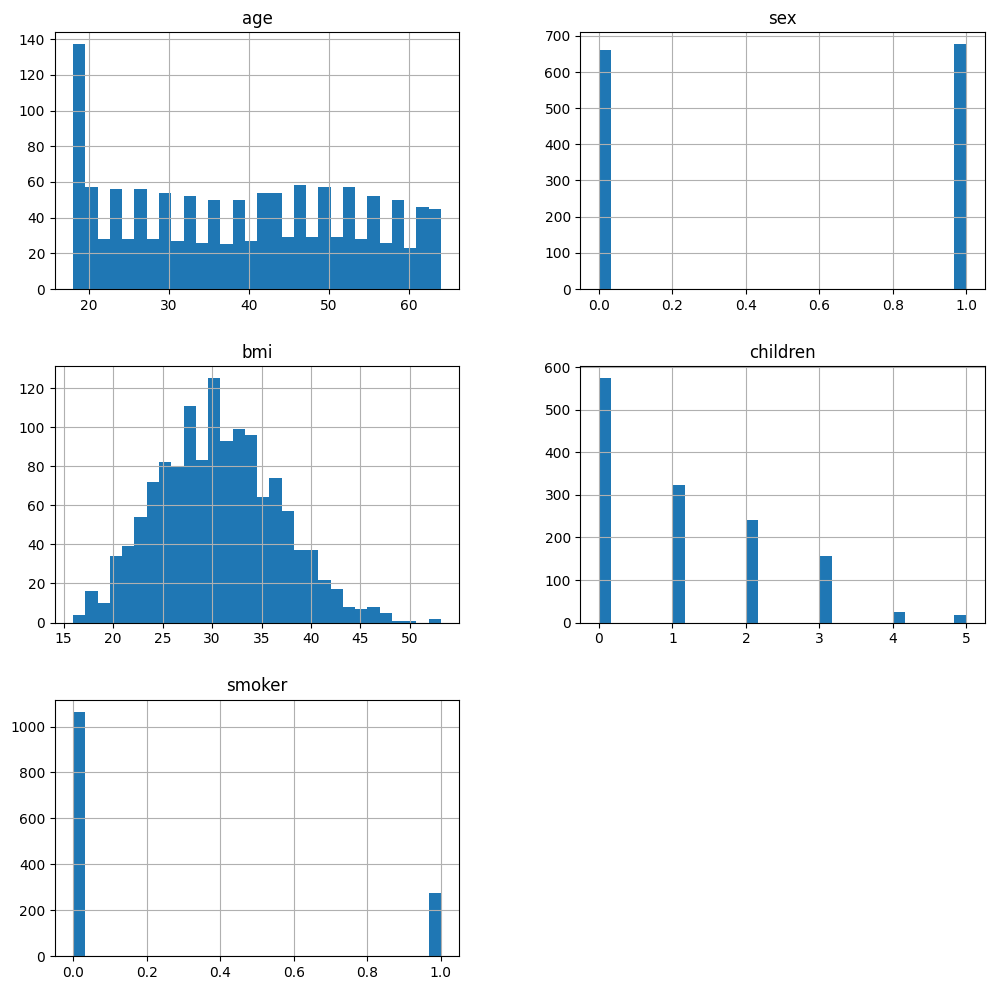

In [8]:
ins_df[['age','sex','bmi','children','smoker']].hist(bins = 30 ,figsize = (12,12))

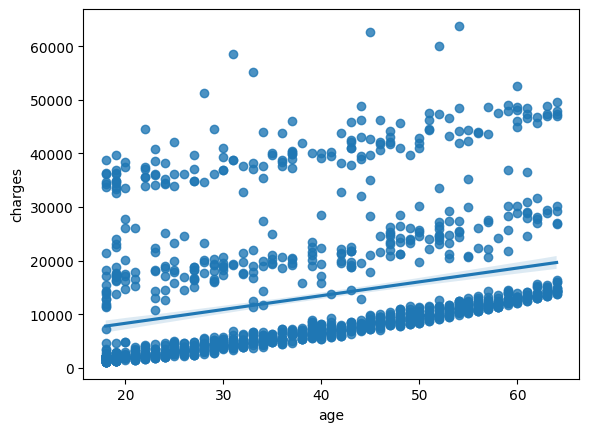

In [9]:
plt.Figure(figsize=(15,6))
sns.regplot(x = 'age',y = 'charges',data = ins_df)
plt.show()

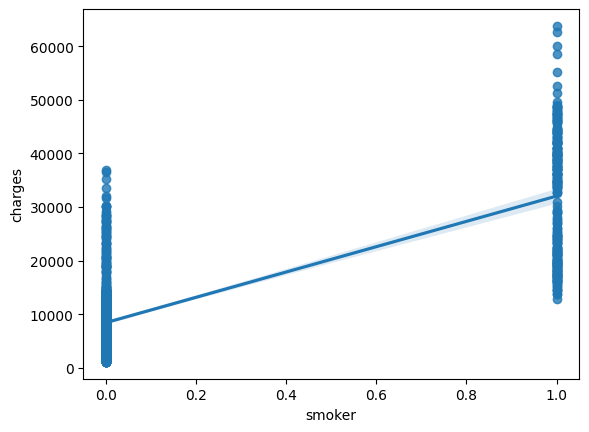

In [10]:
plt.Figure(figsize=(15,6))
sns.regplot(x = 'smoker',y = 'charges',data = ins_df)
plt.show()

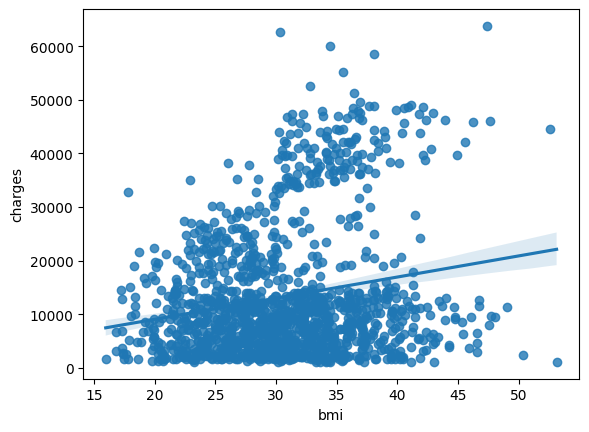

In [11]:
plt.Figure(figsize=(15,6))
sns.regplot(x = 'bmi',y = 'charges',data = ins_df)
plt.show()

In [12]:
X = ins_df.drop(columns=['charges'], axis=1)
y = ins_df['charges']

In [13]:
X.shape

(1338, 5)

In [14]:
y.shape

(1338,)

In [15]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [16]:
y = y.reshape(-1,1)

In [17]:
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ]], dtype=float32)

In [18]:
y.shape

(1338, 1)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print(X_test.shape)
print(X_train.shape)

(268, 5)
(1070, 5)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn import metrics

In [23]:
training_data = regression_model_sklearn.predict(X_train)

In [24]:
r2_train = metrics.r2_score(y_train, training_data)
print(r2_train)

0.7511416332772466


In [25]:
testing_data = regression_model_sklearn.predict(X_test)

In [26]:
r2_test = metrics.r2_score(y_test, testing_data)
print(r2_test)

0.7428803853530372


In [27]:
input_data = (25,1,29.83,2,0)
input_data_as_nparray = np.array(input_data).astype('float32')
input_data_reshape = input_data_as_nparray.reshape(1,-1)
prediction = regression_model_sklearn.predict(input_data_reshape)
print(prediction)


[[5063.8916]]


In [28]:
prediction.dtype

dtype('float32')